# **Slice Type Identification**

## **Data Pre-processing**

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, silhouette_samples, silhouette_score, adjusted_rand_score, accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.manifold import TSNE

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from pandas.plotting import parallel_coordinates
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Circle, Ellipse

import numpy as np
import pandas as pd
import random

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/test_dataset.zip')
data.head()

,LTE/5g Category,Time,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone
0,15,17,0.001000,100,0,1,1,0,1,0,0,0,0,0,0,0
1,14,18,0.000001,10,1,0,0,1,0,0,0,0,0,0,1,0
2,11,7,0.001000,50,1,0,1,0,0,0,1,0,0,0,0,0
3,20,14,0.001000,50,1,0,1,0,0,0,1,0,0,0,0,0
4,2,22,0.001000,50,0,1,0,1,1,0,0,0,0,0,0,0


In [4]:
# Select relevant features for clustering (excluding LTE/5g Category and Time)
# X = data.drop(['LTE/5g Category', 'Time'], axis=1)
features = ['Packet Loss Rate', 'Packet delay', 'IoT',	'LTE/5G',	'GBR',	'Non-GBR', 'AR/VR/Gaming',	'Healthcare',	'Industry 4.0', 'IoT Devices',	'Public Safety',	'Smart City & Home',	'Smart Transportation',	'Smartphone']
# features = ['Packet Loss Rate', 'Packet delay', 'IoT',	'LTE/5G',	'GBR',	'Non-GBR']
# features = ['Packet Loss Rate', 'IoT',	'LTE/5G',	'GBR',	'Non-GBR']
# features = ['Packet Loss Rate', 'Packet delay']
# features = ['Packet Loss Rate']

temp_X = data[features]
temp_X

,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone
0,0.001000,100,0,1,1,0,1,0,0,0,0,0,0,0
1,0.000001,10,1,0,0,1,0,0,0,0,0,0,1,0
2,0.001000,50,1,0,1,0,0,0,1,0,0,0,0,0
3,0.001000,50,1,0,1,0,0,0,1,0,0,0,0,0
4,0.001000,50,0,1,0,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31579,0.000001,10,1,0,0,1,0,0,0,0,0,0,1,0
31580,0.000001,10,1,0,0,1,0,0,1,0,0,0,0,0
31581,0.000001,10,1,0,0,1,0,0,1,0,0,0,0,0
31582,0.010000,75,0,1,0,1,0,0,0,0,0,0,0,1


In [5]:
##########################################################################

# from sklearn.preprocessing import MinMaxScaler

# # Assuming temp_X is your feature matrix
# # Create an instance of MinMaxScaler
# scaler = MinMaxScaler()

# # Fit and transform the data
# X_scaled = scaler.fit_transform(temp_X)

# # Convert the scaled data to a DataFrame
# X = pd.DataFrame(X_scaled, columns=temp_X.columns)

# # Now X contains the scaled features
# X

##########################################################################

# X = temp_X

##########################################################################

tsne = TSNE(n_components=2, random_state=42)  # Reduce to 2 dimensions
X = tsne.fit_transform(temp_X)
X

##########################################################################

array([[  29.2519   ,  168.44315  ],
       [-195.27162  ,    2.3031626],
       [ -51.692886 ,   77.05519  ],
       ...,
       [-150.05016  ,  103.89569  ],
       [  -5.385947 ,  -10.531949 ],
       [-150.05016  ,  103.89569  ]], dtype=float32)

In [6]:
# Split the dataset into training and testing sets
X_train, X_val = train_test_split(X, test_size=0.1, random_state=42)
X_train

array([[-195.27162  ,    2.3031626],
       [  -5.385947 ,  -10.531949 ],
       [  56.162823 ,  -77.17944  ],
       ...,
       [ -68.38442  ,  179.4715   ],
       [ 121.85081  ,  135.25653  ],
       [  29.2519   ,  168.44315  ]], dtype=float32)

In [7]:
X_val

array([[ -51.692886 ,   77.05519  ],
       [-149.54456  , -105.428535 ],
       [-195.27162  ,    2.3031626],
       ...,
       [ 178.85527  ,  -55.281307 ],
       [ -68.652336 , -186.92389  ],
       [  29.2519   ,  168.44315  ]], dtype=float32)

# **EDA**

## Pair Plots

In [8]:
# sns.pairplot(X)
# plt.suptitle('Pairwise Scatter Plots', y=1.02)
# plt.show()

In [9]:
# features_group1 = X.columns[:6]
# features_group1

## Scatter Plots

In [10]:
# # plt.figure(figsize=(30, 14))
# # Create scatter plots for all combinations of features
# sns.pairplot(X[features_group1])
# plt.suptitle('Pairwise Scatter Plots', y=1.02)
# plt.show()

## Feature Distributions

In [11]:
# # Create histograms for each feature
# for feature in features_group1:
#     sns.histplot(X[feature], kde=True)
#     plt.title(f'{feature} Distribution')
#     plt.show()

In [12]:
# # Create box plots for each feature
# for feature in features_group1:
#     sns.boxplot(x=feature, data=X)
#     plt.title(f'Box Plot for {feature}')
#     plt.show()

## Heatmaps

In [13]:
# # Create a heatmap for the correlation matrix of all features
# sns.heatmap(X[features_group1].corr(), annot=True)
# plt.title('Heatmap (Initial Dataset)')
# plt.show()

In [14]:
# # Create a heatmap for the correlation matrix of all features
# plt.figure(figsize=(14, 8))
# sns.heatmap(X_train.corr(), annot=True, annot_kws={"size": 8})
# plt.title('Heatmap (Feature Distribution)')
# plt.show()

## t-SNE (t-Distributed Stochastic Neighbor Embedding)

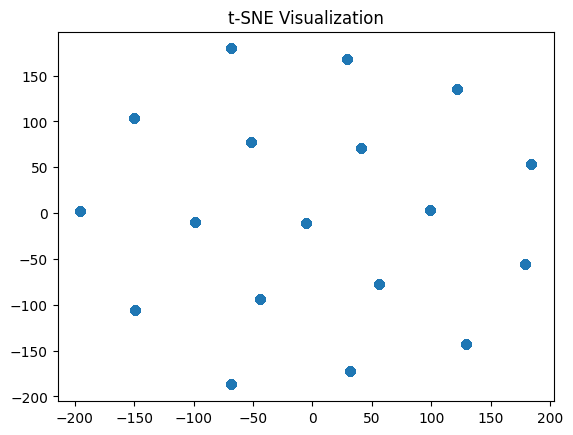

In [15]:
# Assuming 'X' is your feature matrix (shape: [n_samples, n_features])
# tsne = TSNE(n_components=2, random_state=42)  # Reduce to 2 dimensions
# X_tsne = tsne.fit_transform(X)
# X_tsne

# Plot t-SNE visualization
plt.scatter(X[:, 0], X[:, 1])
plt.title('t-SNE Visualization')
# plt.xlabel('t-SNE Component 1')
# plt.ylabel('t-SNE Component 2')
plt.show()

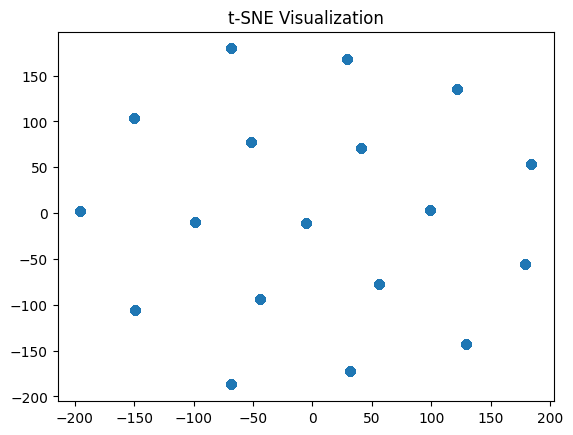

In [16]:
# Assuming 'X' is your feature matrix (shape: [n_samples, n_features])
# tsne = TSNE(n_components=2, random_state=42)  # Reduce to 2 dimensions
# X_train_tsne = tsne.fit_transform(X_train)
# X_train_tsne

# Plot t-SNE visualization
plt.scatter(X_train[:, 0], X_train[:, 1])
plt.title('t-SNE Visualization')
# plt.xlabel('t-SNE Component 1')
# plt.ylabel('t-SNE Component 2')
plt.show()

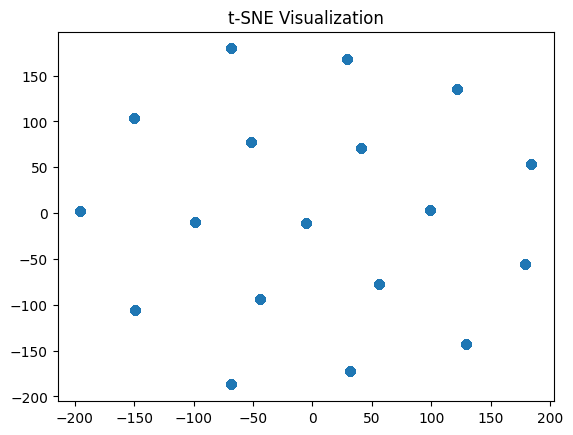

In [17]:
# Assuming 'X' is your feature matrix (shape: [n_samples, n_features])
tsne = TSNE(n_components=2, random_state=42)  # Reduce to 2 dimensions
X_val_tsne = tsne.fit_transform(X_val)
X_val_tsne

# Plot t-SNE visualization
plt.scatter(X_val[:, 0], X_val[:, 1])
plt.title('t-SNE Visualization')
# plt.xlabel('t-SNE Component 1')
# plt.ylabel('t-SNE Component 2')
plt.show()

# **Optimum Cluster Analysis**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

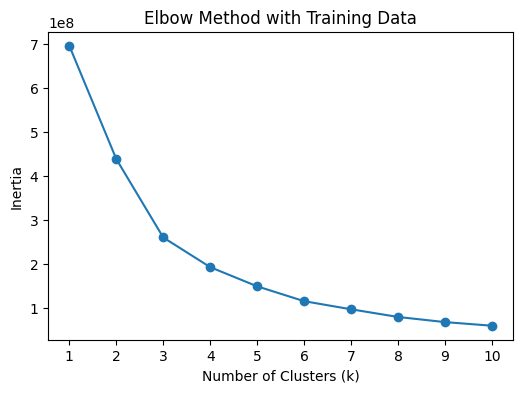

In [18]:
# Elbow Method
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit_predict(X_train)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method with Training Data')
plt.xticks(range(1, 11))
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

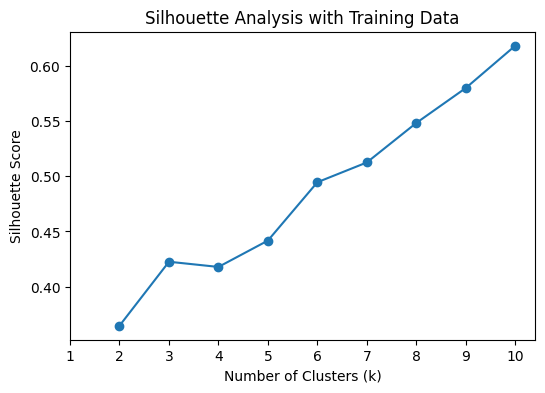

In [19]:
# Silhouette Analysis
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_train)
    silhouette_scores.append(silhouette_score(X_train, labels))

plt.figure(figsize=(6, 4))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis with Training Data')
plt.xticks(range(1, 11))
plt.show()

In [20]:
!pip install gap-stat

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for gap-stat: filename=gap_stat-2.0.3-py3-none-any.whl size=6133 sha256=5b6222b7ee810642580f2dc7caba585bcad838c3317ce0c7896030bc3254a770
  Stored in directory: /root/.cache/pip/wheels/e6/75/de/ee29b366258cdeccdacaff94d895b9d2ffc95a486f3b982441
Successfully built gap-stat


Optimal number of clusters: 8.0


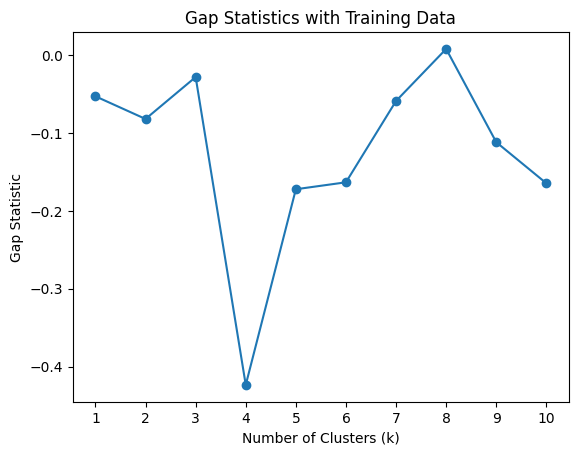

In [21]:
# Gap Statistics
from gap_statistic import OptimalK

# Define the range of cluster values to explore
cluster_range = np.arange(1, 11)
optimal_k = OptimalK(parallel_backend='joblib')
optimal_k(X_train, cluster_array=cluster_range)

n_clusters = optimal_k.gap_df.n_clusters.values[np.argmax(optimal_k.gap_df.gap_value.values)]
print("Optimal number of clusters:", n_clusters)

plt.plot(cluster_range, optimal_k.gap_df.gap_value.values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Gap Statistic')
plt.title('Gap Statistics with Training Data')
plt.xticks(range(1, 11))
plt.show()

In [22]:
optimal_k.gap_df

,n_clusters,gap_value,ref_dispersion_std,sk,gap*,sk*,diff,diff*
0,1.0,-0.052620,6.173299e+05,0.001081,-3.565332e+07,4.117508e+07,0.035051,3.850163e+07
1,2.0,-0.081733,2.079759e+06,0.005937,-3.438175e+07,3.977320e+07,-0.047057,-1.820672e+07
2,3.0,-0.027862,1.548560e+06,0.006814,-7.421199e+06,8.753836e+06,0.398058,1.799367e+08
3,4.0,-0.423585,3.335009e+05,0.002335,-8.695278e+07,1.004052e+08,-0.243287,-2.996567e+07
4,5.0,-0.172065,1.004662e+06,0.008233,-2.643758e+07,3.054953e+07,-0.007638,1.930453e+07
5,6.0,-0.163139,1.336653e+05,0.001288,-2.122877e+07,2.451335e+07,-0.091003,-7.943110e+06
6,7.0,-0.058594,1.186941e+06,0.013542,-6.104630e+06,7.181025e+06,-0.063890,-5.955196e+06
7,8.0,0.008295,2.231213e+05,0.002998,7.106600e+05,8.600936e+05,0.123411,2.079125e+07
8,9.0,-0.111571,2.424785e+05,0.003545,-9.317742e+06,1.076284e+07,0.082333,1.738916e+07
9,10.0,-0.164419,1.780526e+06,0.029485,-1.232616e+07,1.438075e+07,NaN,NaN


# **Cluster Analysis Comparison**

In [23]:
# # Data
# features = ['All', 'Packet Loss Rate, Packet delay, IoT, LTE/5G, GBR, and Non-GBR',
#             'Packet Loss Rate, IoT, LTE/5G, GBR, and Non-GBR', 'Packet Loss Rate, Packet delay', 'Packet Loss Rate']
# num_clusters = [3, 3, 3, 3, 3]
# silhouette_scores_train = [0.743, 0.746, 0.786, 0.75, 1]
# silhouette_scores_val = [0.749, 0.752, 0.785, 0.756, 1]
# silhouette_scores_test = [0.745, 0.748, 0.787, 0.751, 1]
# ari_test = [0.271, 0.271, 0.394, 0.271, 0.224]

# # Plotting Silhouette Scores
# fig, ax = plt.subplots(2, 1, figsize=(20, 8))

# # Silhouette Scores for Training, Validation, and Testing Data
# ax[0].bar(features, silhouette_scores_train, label='Training Data', alpha=0.7)
# ax[0].bar(features, silhouette_scores_val, label='Validation Data', alpha=0.7)
# ax[0].bar(features, silhouette_scores_test, label='Labelled Testing Data', alpha=0.7)

# ax[0].set_ylabel('Silhouette Score')
# ax[0].set_title('Silhouette Scores for Different Scenarios')
# ax[0].legend()

# # ARI for Labelled Testing Data
# ax[1].bar(features, ari_test, color='orange', alpha=0.7)
# ax[1].set_ylabel('ARI (Adjusted Rand Index)')
# ax[1].set_title('ARI for Labelled Testing Data')

# plt.tight_layout()
# plt.show()


# **Data Modelling and Analysis**

In [24]:
# Create a KMeans model
kmeans_model = KMeans(n_clusters=3, random_state=42)

# Fit the model to the training data
kmeans_model.fit(X_train)

# Predict the labels for the test data
y_pred = kmeans_model.predict(X_val)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [25]:
y_pred

array([2, 0, 2, ..., 1, 0, 1], dtype=int32)

In [26]:
labels = kmeans_model.labels_
centroids = kmeans_model.cluster_centers_

In [27]:
labels

array([2, 0, 0, ..., 2, 1, 1], dtype=int32)

In [28]:
centroids

array([[  -8.81737 , -112.10871 ],
       [ 110.0594  ,   64.018524],
       [-113.12399 ,   70.207405]], dtype=float32)

In [29]:
np.unique(labels)

array([0, 1, 2], dtype=int32)

In [30]:
# # Get the column names from the original DataFrame
# X_train_column_names = X_train.columns.tolist()

# # Convert X_test to a pandas DataFrame
# X_train_df = pd.DataFrame(X_train, columns=X_train_column_names)  # Replace X_test_column_names with your actual column names
# X_train_with_predictions = X_train_df.copy()  # Create a copy to avoid modifying the original DataFrame

# # Include the 'labels' as a new column in the DataFrame for coloring
# X_train_with_predictions['cluster_label'] = labels
# X_train_with_predictions

In [31]:
# Map cluster labels to X_train data points
X_train_with_predictions = pd.DataFrame({'Feature1': X_train[:, 0], 'Feature2': X_train[:, 1], 'cluster_label': labels})
X_train_with_predictions

,Feature1,Feature2,cluster_label
0,-195.271622,2.303163,2
1,-5.385947,-10.531949,0
2,56.162823,-77.179443,0
3,184.111694,52.982048,1
4,40.934265,70.585342,1
...,...,...,...
28420,-44.112846,-94.013969,0
28421,-51.692886,77.055191,2
28422,-68.384422,179.471497,2
28423,121.850807,135.256531,1


In [32]:
# # Get the column names from the original DataFrame
# X_val_column_names = X_val.columns.tolist()

# # Convert X_test to a pandas DataFrame
# X_val_df = pd.DataFrame(X_val, columns=X_val_column_names)  # Replace X_test_column_names with your actual column names
# X_val_with_predictions = X_val_df.copy()  # Create a copy to avoid modifying the original DataFrame

# # Resetting indices to avoid alignment issues
# X_val_with_predictions.reset_index(drop=True, inplace=True)
# # y_pred.reset_index(drop=True, inplace=True)
# y_pred = pd.Series(y_pred, name='predicted_cluster_label')

# # Include the 'labels' as a new column in the DataFrame for coloring
# X_val_with_predictions['predicted_cluster_label'] = y_pred
# X_val_with_predictions

In [33]:
# Map cluster y_pred to X_val data points
X_val_with_predictions = pd.DataFrame({'Feature1': X_val[:, 0], 'Feature2': X_val[:, 1], 'predicted_cluster_label': y_pred})
X_val_with_predictions

,Feature1,Feature2,predicted_cluster_label
0,-51.692886,77.055191,2
1,-149.544556,-105.428535,0
2,-195.271622,2.303163,2
3,98.648674,3.307895,1
4,32.089085,-172.160019,0
...,...,...,...
3154,-51.692886,77.055191,2
3155,32.089085,-172.160019,0
3156,178.855270,-55.281307,1
3157,-68.652336,-186.923889,0


In [34]:
# # Cluster Size Distribution

# sns.countplot(x=labels, data=X_train)
# plt.title('Cluster Size Distribution in Training Dataset')
# plt.show()

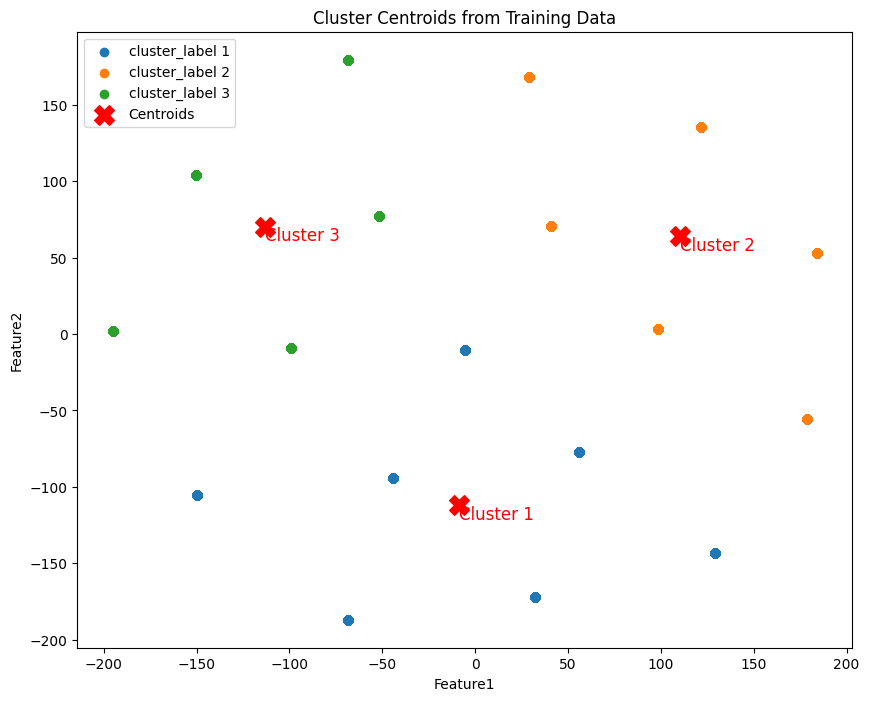

In [35]:
# Plot the scatter plot with different colors for each cluster
plt.figure(figsize=(10, 8))
for cluster in range(3):
    cluster_data_train = X_train_with_predictions[X_train_with_predictions['cluster_label'] == cluster]
    plt.scatter(cluster_data_train.iloc[:, 0], cluster_data_train.iloc[:, 1], label=f'cluster_label {cluster + 1}')

# Plot centroids (optional)
# centroids_temp = scaler.transform(centroids)
centroids_temp = centroids
plt.scatter(centroids_temp[:, 0], centroids_temp[:, 1], marker='X', s=200, c='red', label='Centroids')

for i, centroid in enumerate(centroids_temp):
    plt.text(centroid[0], centroid[1], f'Cluster {i+1}', color='red', fontsize=12, ha='left', va='top')

plt.title('Cluster Centroids from Training Data')
plt.xlabel(X_train_with_predictions.columns[0])
plt.ylabel(X_train_with_predictions.columns[1])
plt.legend(loc='upper left')
plt.show()

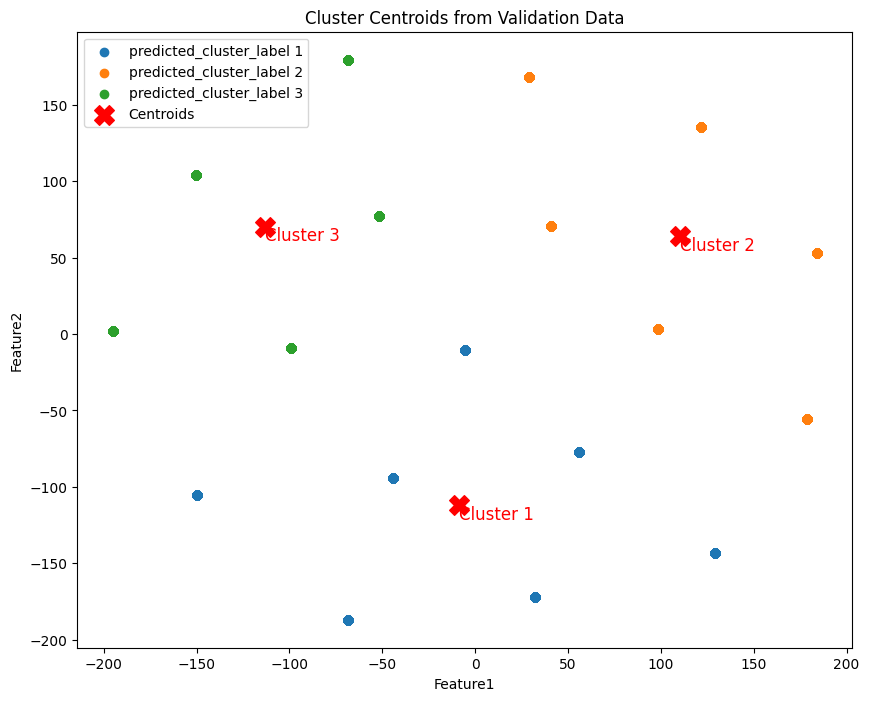

In [36]:
# Plot the scatter plot with different colors for each cluster
plt.figure(figsize=(10, 8))
for cluster in range(3):
    cluster_data_val = X_val_with_predictions[X_val_with_predictions['predicted_cluster_label'] == cluster]
    plt.scatter(cluster_data_val.iloc[:,0], cluster_data_val.iloc[:,1], label=f'predicted_cluster_label {cluster + 1}')

# Plot centroids (optional)
# centroids_temp = scaler.transform(centroids)
centroids_temp = centroids
plt.scatter(centroids_temp[:, 0], centroids_temp[:, 1], marker='X', s=200, c='red', label='Centroids')

for i, centroid in enumerate(centroids_temp):
    plt.text(centroid[0], centroid[1], f'Cluster {i+1}', color='red', fontsize=12, ha='left', va='top')

plt.title('Cluster Centroids from Validation Data')
plt.xlabel(X_val_with_predictions.columns[0])
plt.ylabel(X_val_with_predictions.columns[1])
plt.legend(loc='upper left')
plt.show()

In [37]:
# plt.figure(figsize=(10, 8))

# # Scatter plot of data points
# plt.scatter(X_train[features[0]], X_train[features[1]])

# # Scatter plot of cluster centroids
# plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='red', label='Centroids')

# # Plot circles around centroids
# for i, centroid in enumerate(centroids):
#     circle = plt.Circle((centroid[0], centroid[1]), radius=10, edgecolor='black', facecolor='none', linestyle='dashed')
#     plt.gca().add_patch(circle)
#     plt.text(centroid[0], centroid[1], f'Cluster {i+1}', color='red', fontsize=12, ha='center', va='center')

# plt.title('Clusters with Circles around Centroids')
# plt.xlim(0, max(X_train[features[0]]) + (max(X_train[features[0]])*0.1))
# plt.legend()
# plt.show()

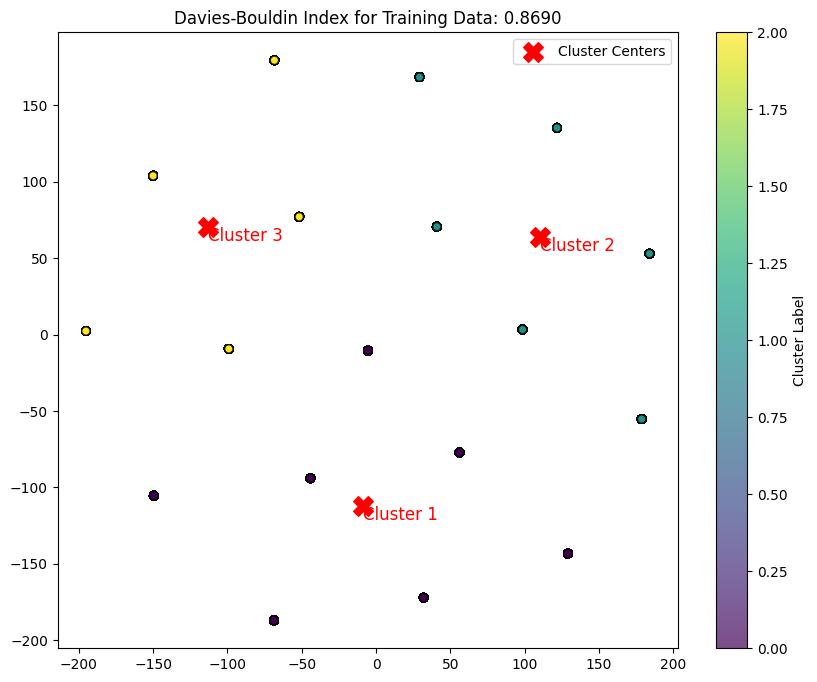

In [38]:
# Davies-Bouldin Index is the ratio of mean inter-cluster variance to mean intra-cluster variance

plt.figure(figsize=(10, 8))

# Calculate Davies-Bouldin Index
db_index_train = metrics.davies_bouldin_score(X_train, labels)

# Plot the data and cluster centers
# scatter = plt.scatter(X_train[features[0]], X_train[features[1]], c = [plt.cm.viridis(i) for i in labels], cmap='viridis', edgecolors='k', alpha=0.7)
scatter = plt.scatter(X_train[:, 0], X_train[:, 1], c = labels, cmap='viridis', edgecolors='k', alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Cluster Centers')

for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Cluster {i+1}', color='red', fontsize=12, ha='left', va='top')

# Add colorbar for better interpretation of Davies-Bouldin Index values
cbar = plt.colorbar(scatter)
cbar.set_label('Cluster Label')

plt.title(f'Davies-Bouldin Index for Training Data: {db_index_train:.4f}')
# plt.xlabel(X_val.columns[0])
# plt.ylabel(X_val.columns[1])
plt.legend()
plt.show()

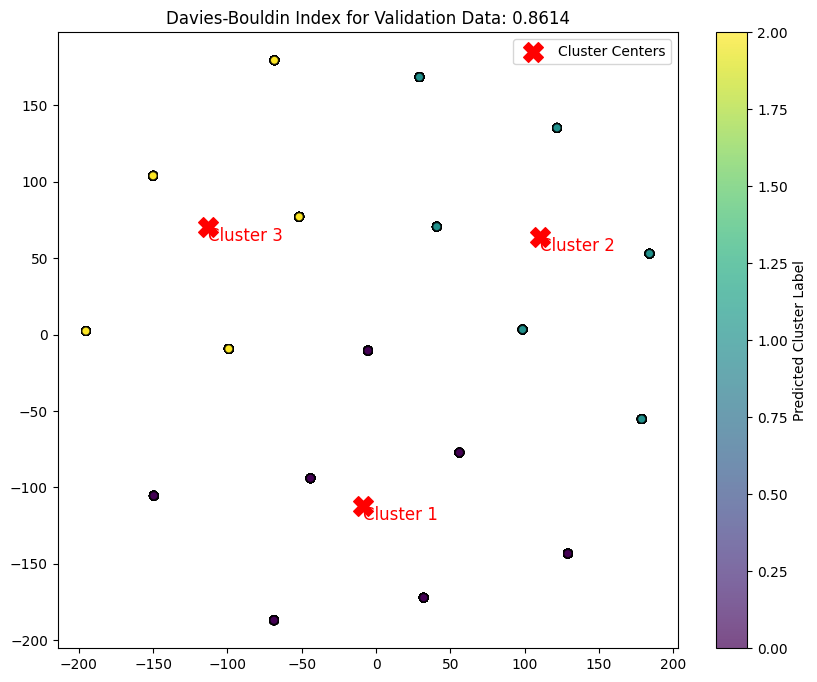

In [39]:
plt.figure(figsize=(10, 8))

# Calculate Davies-Bouldin Index
db_index_val = metrics.davies_bouldin_score(X_val, y_pred)

# Plot the data and cluster centers
# plt.scatter(X_val[features[0]], X_val[features[1]], c = [plt.cm.viridis(i) for i in y_pred], cmap='viridis', edgecolors='k', alpha=0.7)
scatter = plt.scatter(X_val[:, 0], X_val[:, 1], c = y_pred, cmap='viridis', edgecolors='k', alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Cluster Centers')

for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Cluster {i+1}', color='red', fontsize=12, ha='left', va='top')

# Add colorbar for better interpretation of Davies-Bouldin Index values
cbar = plt.colorbar(scatter)
cbar.set_label('Predicted Cluster Label')

plt.title(f'Davies-Bouldin Index for Validation Data: {db_index_val:.4f}')
# plt.xlabel(X_val.columns[0])
# plt.ylabel(X_val.columns[1])
plt.legend()
plt.show()

In [40]:
# It Provides a measure of how well-separated clusters are in the data with the score ranging from -1 to 1
silhouette_score_value1 = silhouette_score(X_train, labels)
print("Silhouette Score for Training Data:", silhouette_score_value1)

silhouette_score_value2 = silhouette_score(X_val, y_pred)
print("Silhouette Score for Validation Data:", silhouette_score_value2)

Silhouette Score for Training Data: 0.42260313
Silhouette Score for Validation Data: 0.42371652


<ipython-input-41-6c07dd74b531>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(np.unique(labels)))


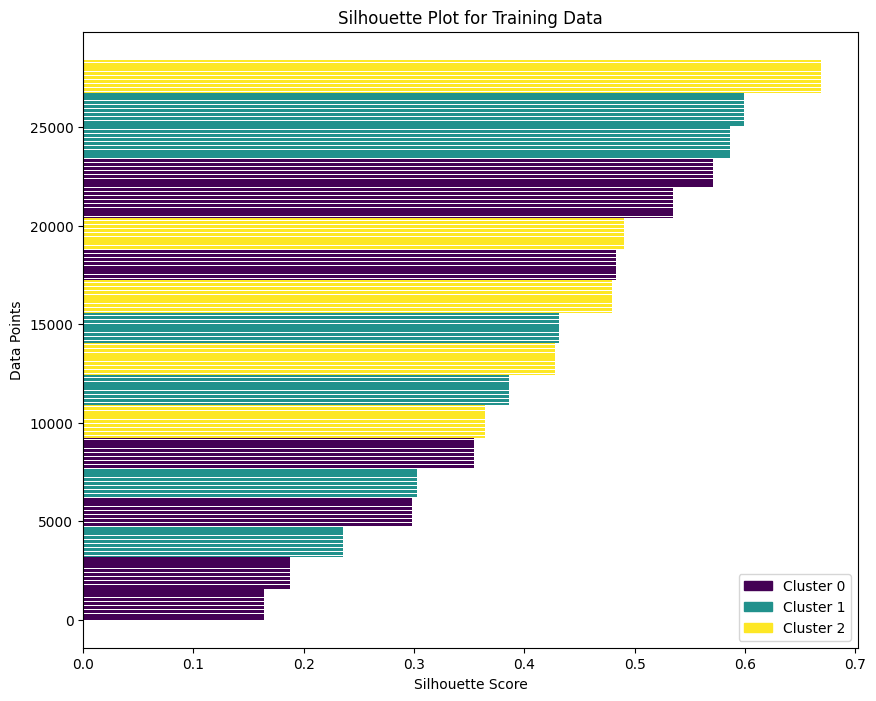

In [41]:
# Silhouette Plots

plt.figure(figsize=(10, 8))

# Create a color map with a unique color for each cluster
colors = plt.cm.get_cmap('viridis', len(np.unique(labels)))

silhouette_train_vals = silhouette_samples(X_train, labels)
sorted_idx = np.argsort(silhouette_train_vals)

# Plot the silhouette bars
bars = plt.barh(range(len(X_train)), silhouette_train_vals[sorted_idx], color=colors(labels[sorted_idx]))

# # Annotate each bar with its cluster label
# for bar, label in zip(bars, labels[sorted_idx]):
#     plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, str(label), va='center', ha='left')

# Create legend based on unique cluster labels
unique_labels = np.unique(labels)
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=colors(label)) for label in unique_labels]
plt.legend(legend_handles, [f'Cluster {label}' for label in unique_labels], loc='lower right')

plt.title('Silhouette Plot for Training Data')
plt.xlabel('Silhouette Score')
plt.ylabel('Data Points')
plt.show()

<ipython-input-42-f7181de7db1c>:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(np.unique(y_pred)))


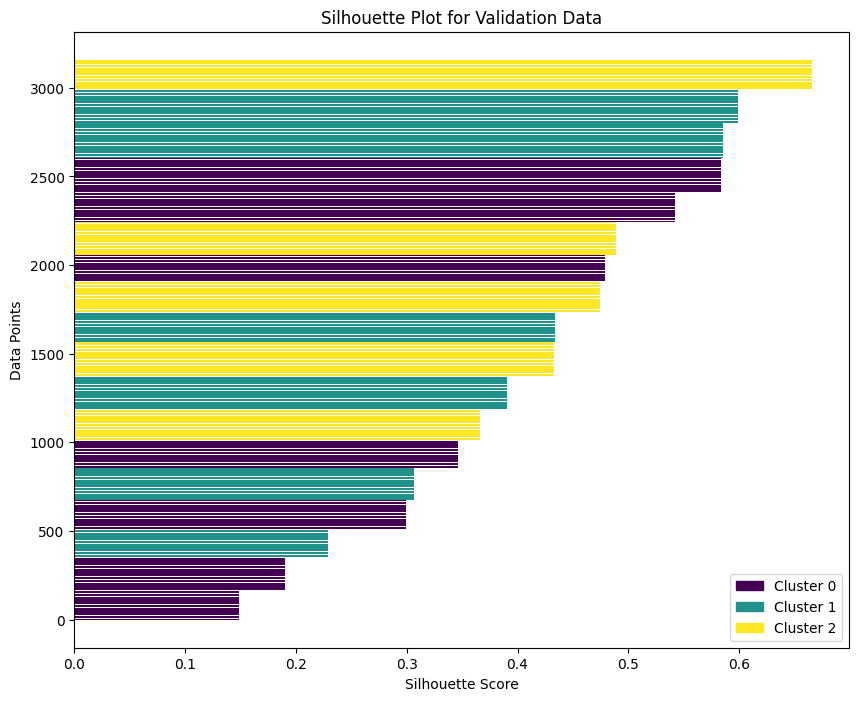

In [42]:
plt.figure(figsize=(10, 8))

# Create a color map with a unique color for each cluster
colors = plt.cm.get_cmap('viridis', len(np.unique(y_pred)))

silhouette_val_vals = silhouette_samples(X_val, y_pred)
sorted_idx = np.argsort(silhouette_val_vals)

# Plot the silhouette bars
bars = plt.barh(range(len(X_val)), silhouette_val_vals[sorted_idx], color=colors(y_pred[sorted_idx]))

# Create legend based on unique cluster labels
unique_labels = np.unique(y_pred)
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=colors(label)) for label in unique_labels]
plt.legend(legend_handles, [f'Cluster {label}' for label in unique_labels], loc='lower right')

plt.title('Silhouette Plot for Validation Data')
plt.xlabel('Silhouette Score')
plt.ylabel('Data Points')
plt.show()

In [43]:
# # Parallel Coordinates Plot

# df_centroids = pd.DataFrame(centroids, columns=features)
# df_centroids['cluster_label'] = range(len(centroids))

# plt.figure(figsize=(10, 6))

# # Use a color map for different clusters
# cmap = plt.cm.get_cmap('viridis', len(df_centroids['cluster_label'].unique()))

# # Plot the parallel coordinates
# # parallel_coordinates(df_centroids, 'cluster_label', color='red')
# parallel_coordinates(df_centroids, 'cluster_label', color=[cmap(cluster) for cluster in df_centroids['cluster_label']], alpha=0.7)
# plt.title('Cluster Centroids (Parallel Coordinates)')

# # Rotate x-axis labels by 90 degrees
# plt.xticks(rotation=90)
# plt.show()

# **Performance Evaluation with Labelled Testing Dataset**

In [44]:
test_data = pd.read_csv('/content/drive/MyDrive/Dataset/train_dataset.zip')
test_data.head()

,LTE/5g Category,Time,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone,slice Type
0,14,0,0.000001,10,1,0,0,1,0,0,0,0,1,0,0,0,3
1,18,20,0.001000,100,0,1,1,0,1,0,0,0,0,0,0,0,1
2,17,14,0.000001,300,0,1,0,1,0,0,0,0,0,0,0,1,1
3,3,17,0.010000,100,0,1,0,1,0,0,0,0,0,0,0,1,1
4,9,4,0.010000,50,1,0,0,1,0,0,0,0,0,1,0,0,2


In [45]:
X_test_temp = test_data[features]
X_test_temp.head()

,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone
0,0.000001,10,1,0,0,1,0,0,0,0,1,0,0,0
1,0.001000,100,0,1,1,0,1,0,0,0,0,0,0,0
2,0.000001,300,0,1,0,1,0,0,0,0,0,0,0,1
3,0.010000,100,0,1,0,1,0,0,0,0,0,0,0,1
4,0.010000,50,1,0,0,1,0,0,0,0,0,1,0,0


In [46]:
tsne = TSNE(n_components=2, random_state=42)  # Reduce to 2 dimensions
X_test_tsne = tsne.fit_transform(X_test_temp)
X_test_tsne

array([[-112.247986,   10.683746],
       [  34.302155,  144.55627 ],
       [ 179.62097 ,  -53.55884 ],
       ...,
       [ 186.2561  ,   57.09097 ],
       [-140.14975 , -108.1259  ],
       [-150.34917 ,  114.5469  ]], dtype=float32)

In [47]:
y_test = test_data['slice Type']

# Assuming labels_true contains the true labels for your test set
labels_true = y_test
labels_true

0        3
1        1
2        1
3        1
4        2
        ..
31578    1
31579    2
31580    2
31581    3
31582    3
Name: slice Type, Length: 31583, dtype: int64

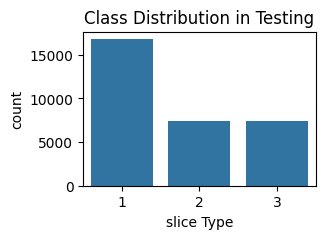

In [48]:
# Class Distribution
plt.figure(figsize=(3, 2))
sns.countplot(x=y_test)
plt.title('Class Distribution in Testing')
plt.show()

In [49]:
# Map cluster labels to X_train data points
X_test = pd.DataFrame({'Feature1': X_test_tsne[:, 0], 'Feature2': X_test_tsne[:, 1]})
X_test

,Feature1,Feature2
0,-112.247986,10.683746
1,34.302155,144.556274
2,179.620972,-53.558842
3,35.541515,51.020481
4,-50.916943,189.096237
...,...,...
31578,35.541515,51.020481
31579,-50.916943,189.096237
31580,186.256104,57.090969
31581,-140.149750,-108.125900


In [50]:
# Predict cluster labels for the test set
labels_test = kmeans_model.predict(X_test)
labels_test

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


array([2, 1, 1, ..., 1, 0, 2], dtype=int32)

In [51]:
np.unique(labels_true)

array([1, 2, 3])

In [52]:
np.unique(labels_test)

array([0, 1, 2], dtype=int32)

In [53]:
# Aligning the Predicted Labels as per True Labels to avoid confusion

aligned_labels_test = labels_test + 1
aligned_labels_test

array([3, 2, 2, ..., 2, 1, 3], dtype=int32)

In [54]:
np.unique(aligned_labels_test)

array([1, 2, 3], dtype=int32)

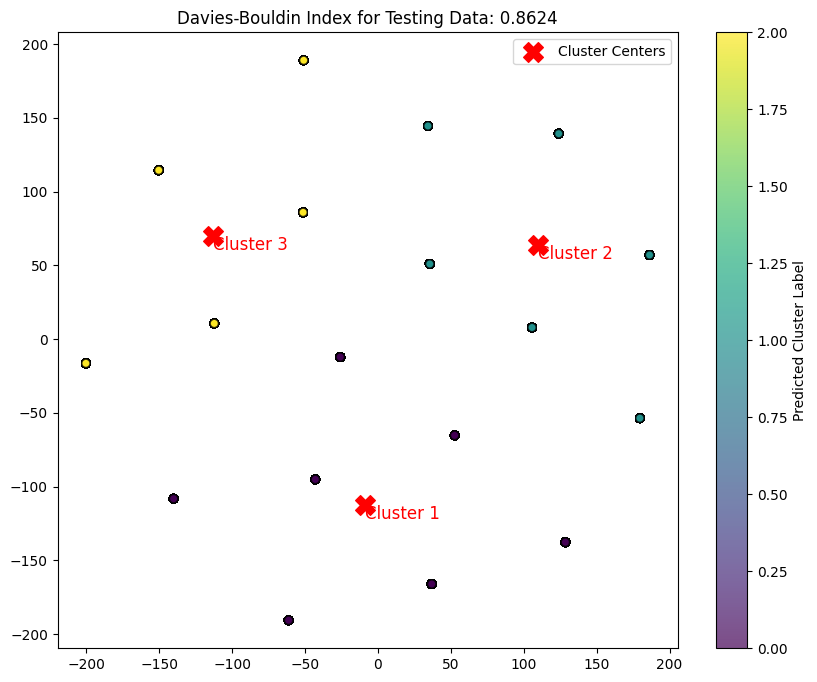

In [55]:
plt.figure(figsize=(10, 8))

# Calculate Davies-Bouldin Index
db_index_test = metrics.davies_bouldin_score(X_test, labels_test)

# Plot the data and cluster centers
# plt.scatter(X_test[features[0]], X_test[features[1]], c = [plt.cm.viridis(i) for i in labels_test], cmap='viridis', edgecolors='k', alpha=0.7)
scatter = plt.scatter(X_test.iloc[:,0], X_test.iloc[:,1], c = labels_test, cmap='viridis', edgecolors='k', alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Cluster Centers')

for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Cluster {i+1}', color='red', fontsize=12, ha='left', va='top')

# Add colorbar for better interpretation of Davies-Bouldin Index values
cbar = plt.colorbar(scatter)
cbar.set_label('Predicted Cluster Label')

plt.title(f'Davies-Bouldin Index for Testing Data: {db_index_test:.4f}')
# plt.xlabel(X_test.columns[0])
# plt.ylabel(X_test.columns[1])
plt.legend()
plt.show()

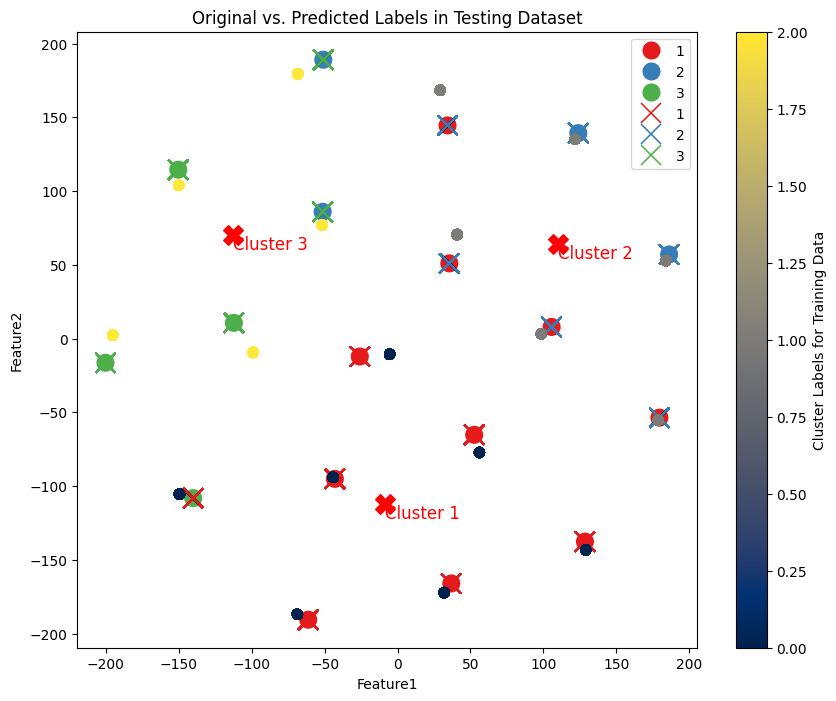

In [56]:
# Original vs. Predicted Labels

plt.figure(figsize=(10, 8))

# sns.scatterplot(x=features[0], y=features[1], hue='slice Type', data=test_data)
sns.scatterplot(x=X_test.iloc[:,0], y=X_test.iloc[:,1], hue=labels_true, data=X_test, palette='Set1', s=200)
sns.scatterplot(x=X_test.iloc[:,0], y=X_test.iloc[:,1], hue=aligned_labels_test, data=X_test, palette='Set1', s=200, marker='x')

scatter=plt.scatter(X_train[:,0], X_train[:,1], s=50, c = labels, cmap='cividis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='red')
cbar = plt.colorbar(scatter)
cbar.set_label('Cluster Labels for Training Data')

for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Cluster {i+1}', color='red', fontsize=12, ha='left', va='top')

plt.title('Original vs. Predicted Labels in Testing Dataset')
plt.legend()
plt.show()

In [57]:
silhouette_test_score_value = silhouette_score(X_test, aligned_labels_test)
print("Silhouette Score for Testing Data:", silhouette_test_score_value)

Silhouette Score for Testing Data: 0.42668936


In [ ]:
# Silhouette Plots

plt.figure(figsize=(10, 8))

# Create a color map with a unique color for each cluster
colors = plt.cm.get_cmap('viridis', len(np.unique(labels_test)))

silhouette_test_vals = silhouette_samples(X_test, labels_test)
sorted_idx = np.argsort(silhouette_test_vals)

# Plot the silhouette bars
bars = plt.barh(range(len(X_test)), silhouette_test_vals[sorted_idx], color=colors(labels_test[sorted_idx]))

# Create legend based on unique cluster labels
unique_labels = np.unique(labels_test)
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=colors(label)) for label in unique_labels]
plt.legend(legend_handles, [f'Cluster {label}' for label in unique_labels], loc='lower right')

plt.title('Silhouette Plot for Testing Data')
plt.xlabel('Silhouette Score')
plt.ylabel('Data Points')
plt.show()

<ipython-input-58-abeeb70ec0e6>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(np.unique(labels_test)))


In [ ]:
# Calculate the Adjusted Rand Index - It is the measure of the similarity of datapoints presents in the clusters and it ranges between 0 and 1
ari = adjusted_rand_score(labels_true, aligned_labels_test)

# Print or use the ARI for evaluation
print("Adjusted Rand Index for Testing(Labelled) Data:", ari)

In [ ]:
# Visualize ARI
# plt.figure(figsize=(8, 4))
plt.bar((np.unique(aligned_labels_test)), [ari], color=['skyblue'])
plt.ylim(0, 1)  # ARI ranges from 0 to 1
plt.title('Adjusted Rand Index (ARI) for Clusters')
plt.xlabel('Predicted Cluster')
plt.ylabel('ARI Score')
plt.show()

In [ ]:
#  Individual Data Point Comparison

# plt.scatter(range(len(labels_true)), labels_true, c=labels_test, cmap='viridis')
plt.scatter(range(len(labels_true)), labels_true, marker='o', label='True Label')
plt.scatter(range(len(labels_test)), aligned_labels_test, marker='x', label='Cluster Assignment')

plt.title('True Label vs. Cluster Assignment')
plt.xlabel('Data Point Index')
plt.ylabel('True Label')
plt.show()

In [ ]:
# Confusion Matrix
plt.figure(figsize=(3, 2))
cm = confusion_matrix(labels_true, aligned_labels_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(labels_true), yticklabels=np.unique(aligned_labels_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Slice Type')
plt.ylabel('Actual Slice Type')
plt.show()

In [ ]:
# Calculate accuracy
print("Accuracy", accuracy_score(labels_true, aligned_labels_test))

# Calculate precision
print("Precision", precision_score(labels_true, aligned_labels_test, average='weighted'))

# Calculate recall
print("Recall", recall_score(labels_true, aligned_labels_test, average='weighted'))

# Calculate F1-score
print("F1-score", f1_score(labels_true, aligned_labels_test, average='weighted'))

## Centroid Distance Evaluation

In [ ]:
distances = kmeans_model.transform(X_test)  # Calculate distances from test data to centroids
closest_centroids_indices = distances.argmin(axis=1)  # Find the index of the closest centroid for each test data point

In [ ]:
distances

In [ ]:
closest_centroids_indices

In [ ]:
# Get the column names from the original DataFrame
X_test_column_names = X_test.columns.tolist()

# Convert X_test to a pandas DataFrame
X_test_df = pd.DataFrame(X_test, columns=X_test_column_names)  # Replace X_test_column_names with your actual column names
X_test_with_predictions = X_test_df.copy()  # Create a copy to avoid modifying the original DataFrame

# Resetting indices to avoid alignment issues
X_test_with_predictions.reset_index(drop=True, inplace=True)
X_test_with_predictions

In [ ]:
X_test_with_predictions['actual_cluster_label'] = y_test
X_test_with_predictions

In [ ]:
# Assuming your test data has labels stored in a column named 'label'
closest_centroids_predicted_labels = [closest_centroids_indices[i] for i in range(len(X_test_with_predictions))]
# Add 1 to each predicted label to align with the range of actual labels
aligned_predicted_labels = [label + 1 for label in closest_centroids_predicted_labels]

X_test_with_predictions['predicted_cluster_label'] = aligned_predicted_labels  # Assign predicted labels to test data dataframe
X_test_with_predictions

In [ ]:
# Confusion Matrix

cm = confusion_matrix(labels_true, aligned_predicted_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(labels_true), yticklabels=np.unique(aligned_predicted_labels))
plt.title('Confusion Matrix for Closest Centroid Evaluation')
plt.xlabel('Predicted Slice Type')
plt.ylabel('Actual Slice Type')
plt.show()

In [ ]:
# Calculate accuracy
print("Accuracy", accuracy_score(labels_true, aligned_predicted_labels))

# Calculate precision
print("Precision", precision_score(labels_true, aligned_predicted_labels, average='weighted'))

# Calculate recall
print("Recall", recall_score(labels_true, aligned_predicted_labels, average='weighted'))

# Calculate F1-score
print("F1-score", f1_score(labels_true, aligned_predicted_labels, average='weighted'))

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot for actual labels
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_test_with_predictions['Feature1'], X_test_with_predictions['Feature2'], c=labels_true, cmap='viridis')
plt.title('Actual Labels')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Actual Label')

# Scatter plot for predicted labels
plt.subplot(1, 2, 2)
plt.scatter(X_test_with_predictions['Feature1'], X_test_with_predictions['Feature2'], c=aligned_predicted_labels, cmap='viridis')
plt.title('Predicted Labels')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Predicted Label')

plt.tight_layout()
plt.show()

In [ ]:
# import numpy as np
# from matplotlib.patches import Circle
# from mpl_toolkits.mplot3d import Axes3D

# # Plot training data with centroids and clusters
# plt.figure(figsize=(10, 7))

# # Plot training data points
# # plt.scatter(X_train['Feature1'], X_train['Feature2'], c=labels, cmap='viridis', label='Training Data')
# plt.scatter(X_train[:,0], X_train[:,1], c=labels, cmap='viridis', label='Training Data')

# # Plot centroids
# plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, c='red', label='Centroids')

# # Draw circles around centroids to denote clusters
# for i in range(len(centroids)):
#     cluster_points = X_train[labels == i]
#     radius = np.max(np.linalg.norm(cluster_points - centroids[i], axis=1))
#     circle = Circle((centroids[i, 0], centroids[i, 1]), radius, color='red', alpha=0.1)
#     plt.gca().add_patch(circle)

# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.title('Training Data with Centroids and Clusters')
# plt.legend()
# plt.grid(True)

In [ ]:
# # Plot a test data point with its distance from the centroids
# plt.figure(figsize=(8, 6))

# # Plot training data points with centroids
# plt.scatter(X_train[:,0], X_train[:,1], c=labels, cmap='viridis', label='Training Data')
# plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, c='red', label='Centroids')

# # Plot the test data point
# plt.scatter(X_test['Feature1'], X_test['Feature2'], color='black', label='Test Point')

# # Draw lines from the test point to centroids
# for i in range(len(centroids)):
#   plt.plot([X_test['Feature1'].iloc[0], centroids[i, 0]], [X_test['Feature2'].iloc[0], centroids[i, 1]], 'k--', alpha=0.5)

# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.title('Test Data Point with Distances to Centroids')
# plt.legend()
# plt.grid(True)

# plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np
# from matplotlib.patches import Circle

# # Plot training data points with centroids and clusters
# plt.figure(figsize=(10, 8))

# # for cluster in range(3):
# #     cluster_data_test = X_train_with_predictions[X_train_with_predictions['cluster_label'] == cluster]
# #     scatter=plt.scatter(cluster_data_test.iloc[:, 0], cluster_data_test.iloc[:, 1], label=f'cluster_label {cluster + 1}')

# # Plot training data points
# scatter=plt.scatter(X_train[:,0], X_train[:,1], c=labels, cmap='cool')

# # Colour Bar for training data points
# cbar = plt.colorbar(scatter)
# cbar.set_label('Training Data Cluster Label')

# # Plot centroids
# plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, c='red', label='Centroids')
# for i, centroid in enumerate(centroids):
#     plt.text(centroid[0], centroid[1], f'Cluster {i+1}', color='red', fontsize=12, ha='left', va='top')

# # Plot circles around centroids to denote clusters
# for i in range(len(centroids)):
#     cluster_points = X_train[labels == i]
#     radius = np.max(np.linalg.norm(cluster_points - centroids[i], axis=1))
#     circle = Circle((centroids[i, 0], centroids[i, 1]), radius, color='red', alpha=0.1)
#     plt.gca().add_patch(circle)

# # Plot the test data point
# plt.scatter(X_test['Feature1'], X_test['Feature2'], color='black', label='Test Point')

# # Draw lines from the test point to centroids
# for point in range(1,5):
#   for i in range(len(centroids)):
#     plt.plot([X_test['Feature1'].iloc[point], centroids[i, 0]], [X_test['Feature2'].iloc[point], centroids[i, 1]], 'k--', alpha=0.5)

# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.title('Training Data with Centroids, Clusters, and Test Data Point with Distances')
# plt.legend()
# plt.grid(True)

# plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np
# from matplotlib.patches import Ellipse

# Plot training data points with centroids and clusters
plt.figure(figsize=(18, 8))

# for cluster in range(3):
#     cluster_data_test = X_train_with_predictions[X_train_with_predictions['cluster_label'] == cluster]
#     scatter=plt.scatter(cluster_data_test.iloc[:, 0], cluster_data_test.iloc[:, 1], label=f'cluster_label {cluster + 1}')

# Plot training data points
scatter=plt.scatter(X_train[:,0], X_train[:,1], c=labels, cmap='cool')

# Colour Bar for training data points
cbar = plt.colorbar(scatter)
cbar.set_label('Cluster Labels for Training Data')

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, c='red', label='Centroids')
for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Cluster {i+1}', color='red', fontsize=12, ha='left', va='top')

# Plot ovals around centroids to denote clusters
for i in range(len(centroids)):
    cluster_points = X_train[labels == i]
    # Calculate the radii along the x and y axes
    x_radius = np.max(np.abs(cluster_points[:, 0] - centroids[i, 0]))
    y_radius = np.max(np.abs(cluster_points[:, 1] - centroids[i, 1]))
    ellipse = Ellipse((centroids[i, 0], centroids[i, 1]), 2 * x_radius, 2 * y_radius, color='red', alpha=0.1)
    plt.gca().add_patch(ellipse)

# # Plot the test data point
# plt.scatter(X_test['Feature1'], X_test['Feature2'], color='black', label='Test Point')

# Draw lines from the test point to centroids
test_point_names = ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10']
for point, name in zip(range(5), test_point_names):
  random_point = random.randint(1, len(X_test))
  for i in range(len(centroids)):
    plt.plot([X_test['Feature1'].iloc[random_point], centroids[i, 0]], [X_test['Feature2'].iloc[random_point], centroids[i, 1]], 'k--', alpha=0.5)

    # Annotate test data points
    plt.scatter(X_test['Feature1'].iloc[random_point], X_test['Feature2'].iloc[random_point], color='black')
    plt.text(X_test['Feature1'].iloc[random_point], X_test['Feature2'].iloc[random_point], name, fontsize=12, ha='right')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Training Data with Centroids & Clusters and Test Data Point with Centroid Distances')
plt.legend()
plt.grid(True)

plt.show()

# **SYNC NOTEBOOKS**

In [ ]:
%cp '/content/drive/MyDrive/Colab Notebooks/Exp3 - Slice_Identification_UnSupML_tsne.ipynb' '/content/drive/MyDrive/Network_Slicing_with_ML_repo/Network-Slicing-with-ML/Notebooks/'